In [2]:
import pyuvdata
import pickle
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os

In [4]:
#with open('/lustre/rbyrne/equalization_coeffs_20250505.pkl', 'rb') as f:
#    dictionary = pickle.load(f)

In [5]:
#Image("/lustre/rbyrne/autocorrelation_plots/20250410_070800.png")

In [20]:
use_freq_bands = [
        "13",
        "18",
        "23",
        "27",
        "32",
        "36",
        "41",
        "46",
        "50",
        "55",
        "59",
        "64",
        "69",
        "73",
        "78",
        "82",
    ]
#use_files = [f"/lustre/pipeline/slow/{freq}MHz/2025-06-25/22/20250625_224930_{freq}MHz.ms" for freq in use_freq_bands]  # -3
#use_files = [f"/lustre/pipeline/slow/{freq}MHz/2025-06-25/22/20250625_225310_{freq}MHz.ms" for freq in use_freq_bands]  # -1
#use_files = [f"/lustre/pipeline/slow/{freq}MHz/2025-06-25/22/20250625_225611_{freq}MHz.ms" for freq in use_freq_bands]  # 1
#use_files = [f"/lustre/pipeline/slow/{freq}MHz/2025-06-25/22/20250625_225921_{freq}MHz.ms" for freq in use_freq_bands]  # 3
use_files = [f"/lustre/pipeline/slow/{freq}MHz/2025-06-25/23/20250625_235953_{freq}MHz.ms" for freq in use_freq_bands]  # 0
use_files = [filename for filename in use_files if os.path.isdir(filename)]
for file_ind, filename in enumerate(use_files):
    uvnew = pyuvdata.UVData()
    uvnew.read_ms(filename, data_column="DATA")
    #uvnew.select(antenna_names=["LWA073"])
    uvnew.select(ant_str="autos")
    if file_ind == 0:
        uv = uvnew
    else:
        uv.fast_concat(uvnew, "freq", inplace=True, run_check=False)
uv.data_array[np.where(uv.data_array == 0)] = np.nan

Setting telescope_location to value in known_telescopes for OVRO-LWA.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1.9488404249245832 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1.9488315387102375 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1.94881564149955 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
Setting telescope_location to value in known_telescopes f

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


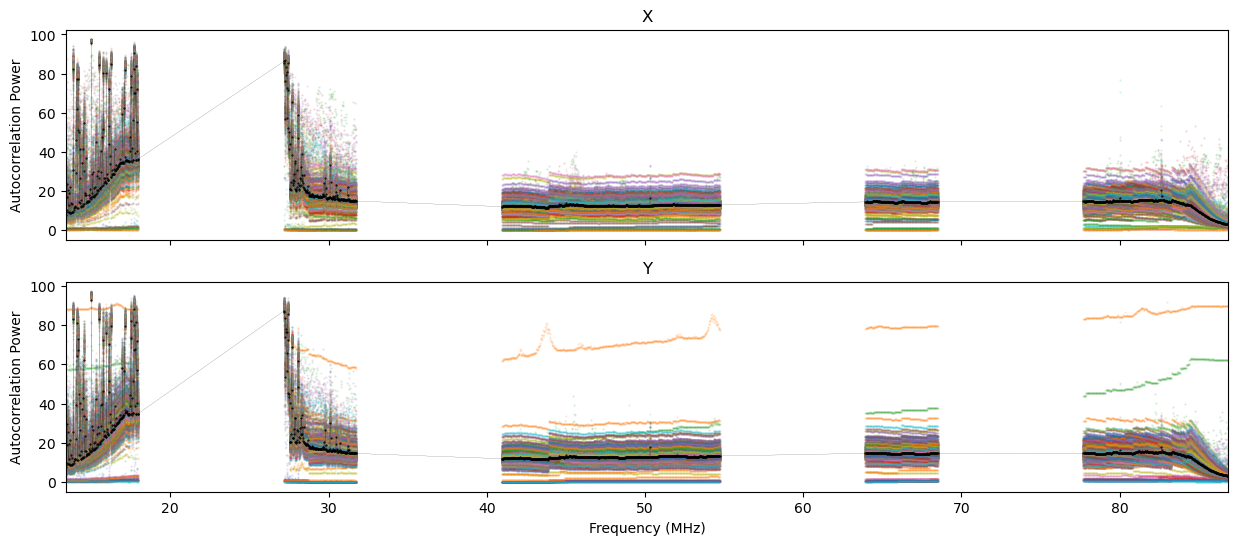

In [21]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15,6))
ax[1].set_xlabel("Frequency (MHz)")
pol_names = ["X", "Y"]
for pol in range(2):
    ax[pol].set_ylabel("Autocorrelation Power")
    ax[pol].set_title(pol_names[pol])
    ax[pol].set_xlim(np.min(uv.freq_array)/1e6, np.max(uv.freq_array)/1e6)
    #ax[pol].set_ylim(np.nanmean(uv.data_array[:, :, pol]) - 10, np.nanmean(uv.data_array[:,:,pol]) + 10)
    #ax[pol].set_xlim(40,55)
    #ax[pol].set_ylim((15,40))
    for ant in range(352):
        ax[pol].plot(uv.freq_array/1e6, uv.data_array[ant, :, pol], ".", markersize=1, alpha=0.2)
    ax[pol].plot(uv.freq_array/1e6, np.nanmean(uv.data_array, axis=0)[:, pol], ".-", linewidth=0.1, markersize=1, color="black")
plt.show()


In [36]:
-1.220703125*3

-3.662109375

In [3]:
eq_coeff_slope = [-3.662109375, -1.220703125, 1.220703125, 3.662109375, 0]
time_stamps = ["224930", "225310", "225611", "225921", "230252"]
autocorr_list = []
for eq_coeff_ind in range(len(eq_coeff_slope)):  # Get autocorrs
    use_freq_bands = [
            "13",
            "18",
            "23",
            "27",
            "32",
            "36",
            "41",
            "46",
            "50",
            "55",
            "59",
            "64",
            "69",
            "73",
            "78",
            "82",
        ]
    use_files = [f"/lustre/pipeline/slow/{freq}MHz/2025-06-25/{time_stamps[eq_coeff_ind][:2]}/20250625_{time_stamps[eq_coeff_ind]}_{freq}MHz.ms" for freq in use_freq_bands]
    use_files = [filename for filename in use_files if os.path.isdir(filename)]
    for file_ind, filename in enumerate(use_files):
        uvnew = pyuvdata.UVData()
        uvnew.read_ms(filename, data_column="DATA")
        uvnew.select(ant_str="autos")
        if file_ind == 0:
            uv = uvnew
        else:
            uv.fast_concat(uvnew, "freq", inplace=True, run_check=False)
    uv.data_array[np.where(uv.data_array == 0)] = np.nan
    autocorr_list.append(uv)

Setting telescope_location to value in known_telescopes for OVRO-LWA.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
Setting telescope_lo

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


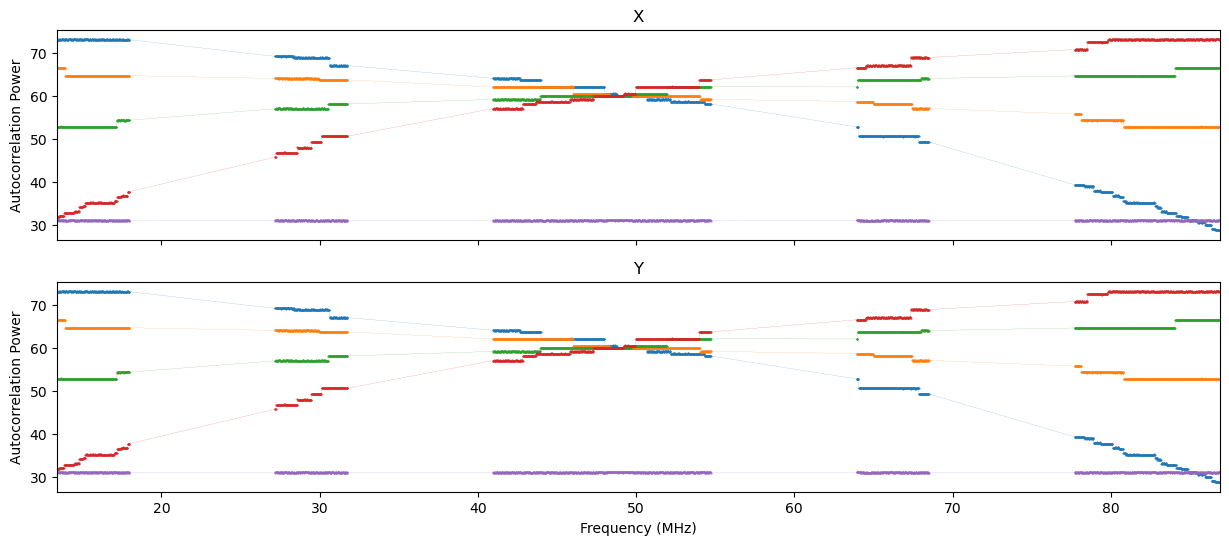

In [4]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15,6))
ax[1].set_xlabel("Frequency (MHz)")
pol_names = ["X", "Y"]
for uv in autocorr_list:
    for pol in range(2):
        ax[pol].set_ylabel("Autocorrelation Power")
        ax[pol].set_title(pol_names[pol])
        ax[pol].set_xlim(np.min(uv.freq_array)/1e6, np.max(uv.freq_array)/1e6)
        ax[pol].plot(uv.freq_array/1e6, np.nanmean(uv.data_array, axis=0)[:, pol], ".-", linewidth=0.1, markersize=1)
plt.show()

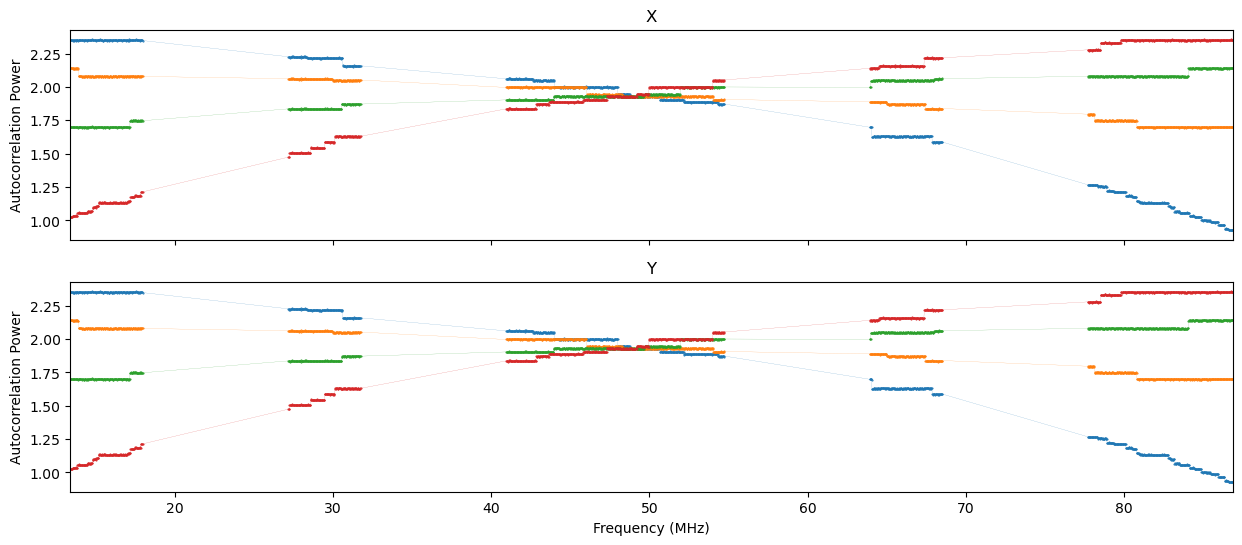

In [5]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15,6))
ax[1].set_xlabel("Frequency (MHz)")
pol_names = ["X", "Y"]
for uv in autocorr_list[:-1]:
    for pol in range(2):
        ax[pol].set_ylabel("Autocorrelation Power")
        ax[pol].set_title(pol_names[pol])
        ax[pol].set_xlim(np.min(uv.freq_array)/1e6, np.max(uv.freq_array)/1e6)
        ax[pol].plot(uv.freq_array/1e6, np.nanmean(uv.data_array, axis=0)[:, pol]/np.nanmean(autocorr_list[-1].data_array, axis=0)[:, pol], ".-", linewidth=0.1, markersize=1)
plt.show()

In [6]:
eq_coeffs = np.zeros((4,4096))
min_val = 3000
max_val = 18000
eq_coeffs[0, :] = (np.arange(4096)[::-1]*(max_val-min_val)/4096 + min_val)
eq_coeffs[1, :] = eq_coeffs[0, :]/3 + (2/3)*np.mean(eq_coeffs[0, :])
eq_coeffs[3, :] = (np.arange(4096)*(max_val-min_val)/4096 + min_val)
eq_coeffs[2, :] = eq_coeffs[3, :]/3 + (2/3)*np.mean(eq_coeffs[3, :])

mean_autocorrs_normalized = np.zeros((4, 2, 4096))
for ind in range(4):
    for pol_ind in range(2):
        freq_array = np.arange(4096)*np.mean(autocorr_list[ind].channel_width)
        for freq_ind in range(autocorr_list[ind].Nfreqs):
            mean_autocorrs_normalized[ind, pol_ind, freq_ind] = np.nanmean(autocorr_list[ind].data_array, axis=0)[freq_ind, pol_ind] / eq_coeffs[ind, np.where(freq_array==autocorr_list[ind].freq_array[freq_ind])[0][0]]**2

Casting complex values to real discards the imaginary part


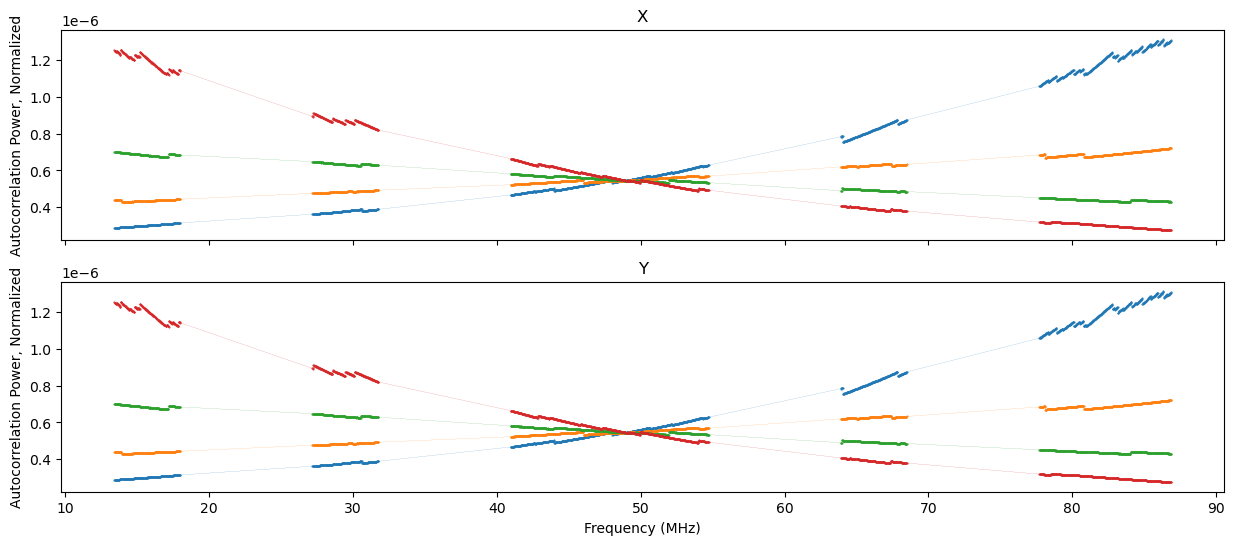

In [7]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15,6))
ax[1].set_xlabel("Frequency (MHz)")
pol_names = ["X", "Y"]
for ind in range(4):
    for pol in range(2):
        ax[pol].set_ylabel("Autocorrelation Power, Normalized")
        ax[pol].set_title(pol_names[pol])
        #ax[pol].set_xlim(np.min(uv.freq_array)/1e6, np.max(uv.freq_array)/1e6)
        use_freqs = autocorr_list[ind].freq_array/1e6
        ax[pol].plot(use_freqs, mean_autocorrs_normalized[ind, pol, :len(use_freqs)], ".-", linewidth=0.1, markersize=1)
plt.show()

Casting complex values to real discards the imaginary part


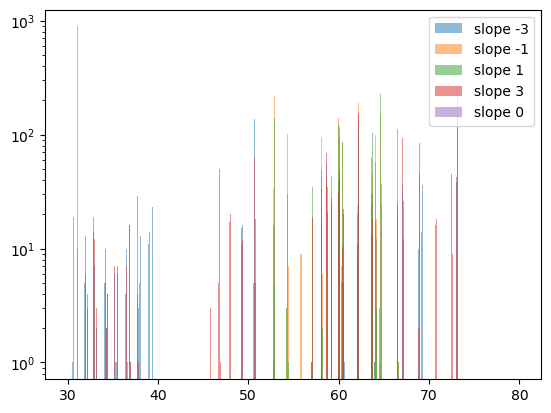

In [19]:
binsize = .1
plt.hist(np.nanmean(autocorr_list[0].data_array, axis=0)[:, 0], bins=np.arange(30,80,binsize), alpha=.5, label="slope -3")
plt.hist(np.nanmean(autocorr_list[1].data_array, axis=0)[:, 0], bins=np.arange(30,80,binsize), alpha=.5, label="slope -1")
plt.hist(np.nanmean(autocorr_list[2].data_array, axis=0)[:, 0], bins=np.arange(30,80,binsize), alpha=.5, label="slope 1")
plt.hist(np.nanmean(autocorr_list[3].data_array, axis=0)[:, 0], bins=np.arange(30,80,binsize), alpha=.5, label="slope 3")
plt.hist(np.nanmean(autocorr_list[4].data_array, axis=0)[:, 0], bins=np.arange(30,80,binsize), alpha=.5, label="slope 0")
plt.legend()
plt.yscale("log")
plt.show()

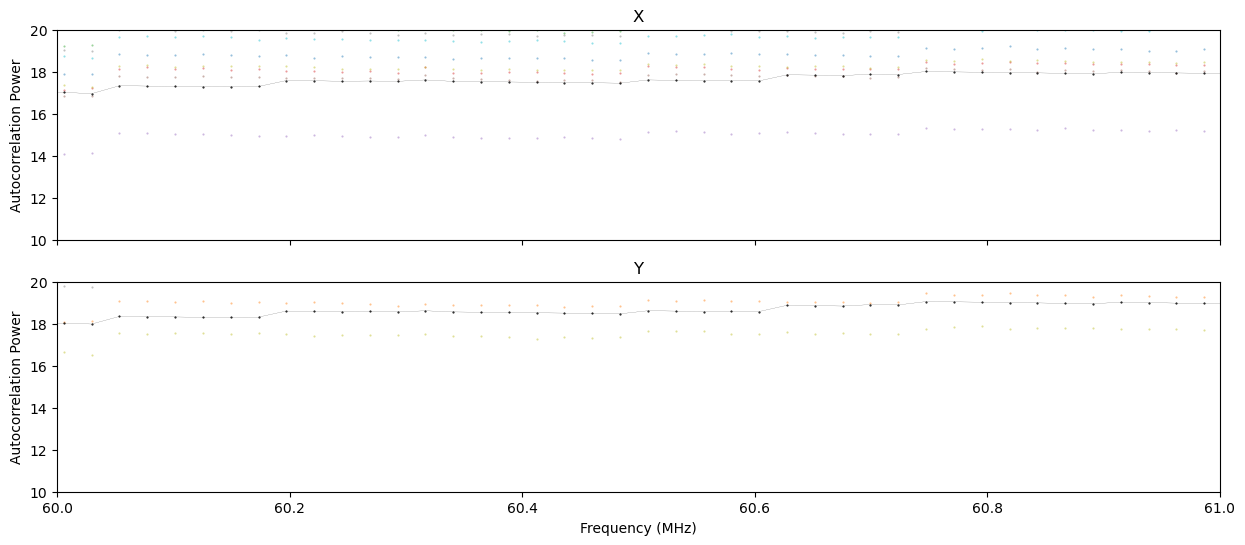

In [42]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15,6))
ax[1].set_xlabel("Frequency (MHz)")
pol_names = ["X", "Y"]
for pol in range(2):
    ax[pol].set_ylabel("Autocorrelation Power")
    ax[pol].set_title(pol_names[pol])
    ax[pol].set_xlim(60,61)
    ax[pol].set_ylim(10,20)
    for ant in range(10):
        ax[pol].plot(uv.freq_array/1e6, uv.data_array[ant, :, pol], ".", markersize=1, alpha=0.5)
    ax[pol].plot(uv.freq_array/1e6, np.nanmean(uv.data_array, axis=0)[:, pol], ".-", linewidth=0.1, markersize=1, color="black")
plt.show()

(1, 0)


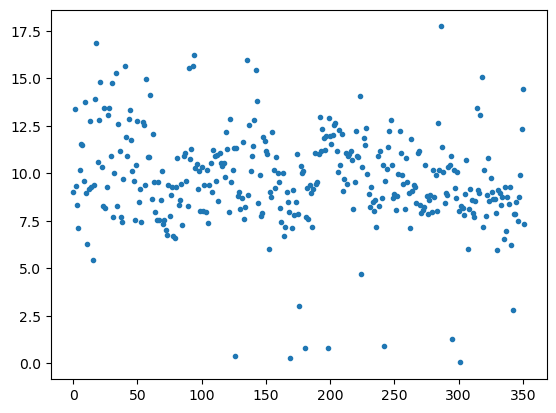

In [43]:
#np.where(uv.data_array[:, :, 0] > 60)
print(np.shape(np.where(uv.data_array[:, 172, 0] > 50)))
plt.plot(uv.data_array[:, 172, 0], ".")
for ant in uv.ant_1_array[np.where(uv.data_array[:, 172, 0] > 50)]:
    print(uv.telescope.antenna_names[ant])

In [44]:
expected_ants = ['LWA-012A', 'LWA-044A', 'LWA-043A', 'LWA-046A', 'LWA-045A', 'LWA-071A', 'LWA-047A', 'LWA-074A', 'LWA-073A', 'LWA-077A', 'LWA-075A', 'LWA-013A', 'LWA-016A', 'LWA-015A', 'LWA-014A', 'LWA-018A', 'LWA-017A', 'LWA-020A', 'LWA-019A', 'LWA-021A', 'LWA-048A', 'LWA-072A', 'LWA-101A', 'LWA-103A', 'LWA-102A', 'LWA-105A', 'LWA-104A', 'LWA-139A', 'LWA-108A', 'LWA-107A', 'LWA-143A', 'LWA-142A', 'LWA-144A', 'LWA-136A', 'LWA-140A', 'LWA-138A', 'LWA-141A', 'LWA-167A', 'LWA-166A', 'LWA-170A', 'LWA-234A', 'LWA-173A', 'LWA-171A', 'LWA-169A', 'LWA-204A', 'LWA-206A', 'LWA-205A', 'LWA-208A', 'LWA-207A', 'LWA-210A', 'LWA-209A', 'LWA-233A', 'LWA-236A', 'LWA-235A', 'LWA-238A', 'LWA-237A', 'LWA-240A', 'LWA-239A', 'LWA-254A', 'LWA-243A', 'LWA-242A', 'LWA-245A']
antnames_formatted = []
for ant in uv.ant_1_array[np.where(uv.data_array[:, 172, 0] > 50)]:
    antname_formatted = f"{uv.telescope.antenna_names[ant][0:3]}-{uv.telescope.antenna_names[ant][3:6]}A"
    antnames_formatted.append(antname_formatted)
    if antname_formatted not in expected_ants:
        print(antname_formatted)
for antname in expected_ants:
    if antname not in antnames_formatted:
        print(antname)

LWA-012A
LWA-044A
LWA-043A
LWA-046A
LWA-045A
LWA-071A
LWA-047A
LWA-074A
LWA-073A
LWA-077A
LWA-075A
LWA-013A
LWA-016A
LWA-015A
LWA-014A
LWA-018A
LWA-017A
LWA-020A
LWA-019A
LWA-021A
LWA-048A
LWA-072A
LWA-101A
LWA-103A
LWA-102A
LWA-105A
LWA-104A
LWA-139A
LWA-108A
LWA-107A
LWA-143A
LWA-142A
LWA-144A
LWA-136A
LWA-140A
LWA-138A
LWA-141A
LWA-167A
LWA-166A
LWA-170A
LWA-234A
LWA-173A
LWA-171A
LWA-169A
LWA-204A
LWA-206A
LWA-205A
LWA-208A
LWA-207A
LWA-210A
LWA-209A
LWA-233A
LWA-236A
LWA-235A
LWA-238A
LWA-237A
LWA-240A
LWA-239A
LWA-254A
LWA-243A
LWA-242A
LWA-245A


In [45]:
uv.freq_array[172]

17513671.875

In [46]:
(dictionary["antnames"][0])

'LWA-266A'

In [47]:
np.mean(uv.channel_width)*4096/1e6

98.0

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

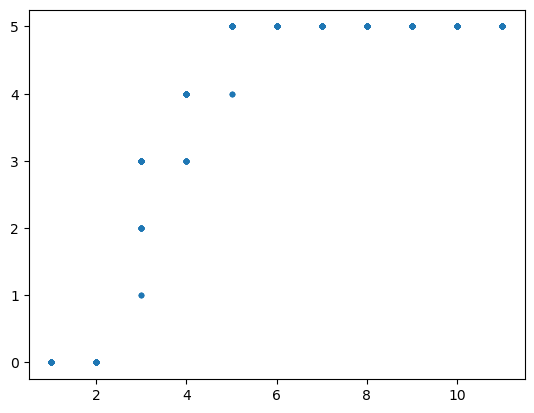

In [48]:
print(dictionary["snaps"])
print(dictionary["coeffs_set_inds"])
plt.plot(dictionary["snaps"], dictionary["coeffs_set_inds"], ".")
plt.show()

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


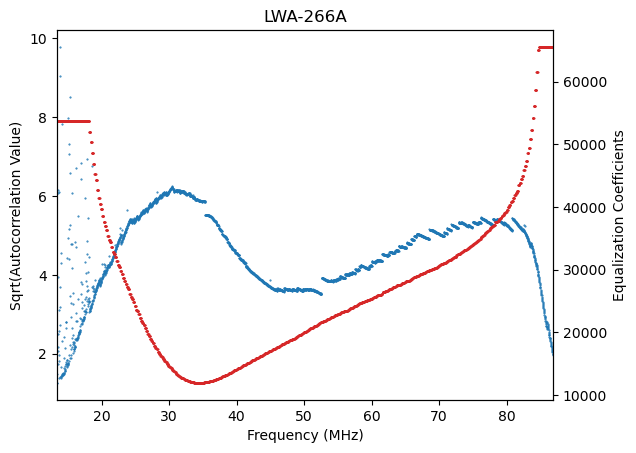

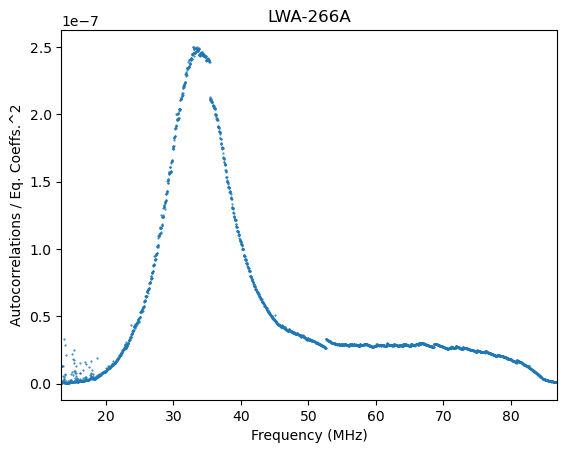

In [49]:
for ant_ind, ant in enumerate(dictionary["antnames"][0:1]):
    eq_coeffs = dictionary["coeffs_set"][dictionary["coeffs_set_inds"][ant_ind]]
    eq_coeffs = np.repeat(eq_coeffs, 8)  # One coefficient per 8 channels
    eq_freqs = np.arange(len(eq_coeffs)) * np.mean(uv.channel_width)

    # Truncate equalization coefficents to include only those saved in the data
    eq_coeffs = eq_coeffs[560:-464]
    eq_freqs = eq_freqs[560:-464]

    use_antname = f"{ant[0:3]}{ant[4:7]}"
    if ant[-1] == "A":
        use_pol = -5
    elif ant[-1] == "B":
        use_pol = -6
    autocorrs_single_ant = uv.select(antenna_names=use_antname, polarizations=use_pol, inplace=False)


    fig, ax1 = plt.subplots()
    ax1.set_title(ant)
    ax1.set_xlabel("Frequency (MHz)")
    ax1.plot(autocorrs_single_ant.freq_array/1e6, np.sqrt(autocorrs_single_ant.data_array[0, :, 0]), ".", markersize=1)
    ax1.set_ylabel("Sqrt(Autocorrelation Value)")
    #ax1.set_ylim([3.5,4.5])
    ax1.set_xlim([np.min(autocorrs_single_ant.freq_array)/1e6, np.max(autocorrs_single_ant.freq_array)/1e6])
    #ax1.set_xlim([50, 51])

    ax2=ax1.twinx()
    ax2.plot(eq_freqs/1e6, eq_coeffs, ".", markersize=1, color="tab:red")
    ax2.set_ylabel("Equalization Coefficients")
    #ax2.set_ylim([17500,22500])
    plt.show()
    plt.close()

    lowest_eq_ind = np.where(eq_freqs == np.min(autocorrs_single_ant.freq_array))[0][0]
    highest_eq_ind = np.where(eq_freqs == np.max(autocorrs_single_ant.freq_array))[0][0]
    eq_coeffs = eq_coeffs[lowest_eq_ind:highest_eq_ind+1]
    eq_freqs = eq_freqs[lowest_eq_ind:highest_eq_ind+1]

    autos_normalized = autocorrs_single_ant.data_array[0, :, 0] / (eq_coeffs)**2.0
    plt.plot(autocorrs_single_ant.freq_array/1e6, autos_normalized, ".", markersize=1)
    plt.xlim([np.min(autocorrs_single_ant.freq_array)/1e6, np.max(autocorrs_single_ant.freq_array)/1e6])
    plt.ylabel("Autocorrelations / Eq. Coeffs.^2")
    plt.xlabel("Frequency (MHz)")
    plt.title(ant)
    plt.show()
    plt.close()

In [50]:
np.max(dictionary["bps"])

2

In [51]:
lowest_eq_ind = np.where(eq_freqs == np.min(autocorrs_single_ant.freq_array[0]))[0][0]
highest_eq_ind = np.where(eq_freqs == np.max(autocorrs_single_ant.freq_array[0]))[0][0]

In [52]:
print(lowest_eq_ind)
print(highest_eq_ind)

0
0


In [53]:
eq_coeffs_mat = scipy.io.loadmat("/home/pipeline/opsdata/20241213-settingsAll-night.mat")
print(eq_coeffs_mat.keys())
print(eq_coeffs_mat["eq4"])  # Which antennas use that set of equalization coefficients
print(eq_coeffs_mat["antNames"])  # Antenna ordering

dict_keys(['__header__', '__version__', '__globals__', 'adrs', 'antNames', 'coef', 'comment', 'delay_dsig', 'eq0', 'eq1', 'eq2', 'eq3', 'eq4', 'eq5', 'eq6', 'exclude', 'fftShift', 'settings', 'sigtab', 'time'])
[[132 133 136 137 138 139 140 141 142 143 144 145 146 147 150 151 152 153
  154 155 156 157 158 159 320 321 326 327 332 333 334 335 336 337 338 339
  344 345 346 347 350 351 362 363 364 365 368 369 370 371 372 373 512 513
  514 515 516 517 528 529 530 531 532 533 534 535 542 543 548 549 550 551
  552 553 554 555 556 557 558 559 560 561 566 567 590 591 604 605 606 607
  608 609 610 611 614 615]]
['LWA-266A' 'LWA-266B' 'LWA-259A' 'LWA-259B' 'LWA-268A' 'LWA-268B'
 'LWA-267A' 'LWA-267B' 'LWA-271A' 'LWA-271B' 'LWA-269A' 'LWA-269B'
 'LWA-276A' 'LWA-276B' 'LWA-273A' 'LWA-273B' 'LWA-278A' 'LWA-278B'
 'LWA-277A' 'LWA-277B' 'LWA-282A' 'LWA-282B' 'LWA-281A' 'LWA-281B'
 'LWA-307A' 'LWA-307B' 'LWA-285A' 'LWA-285B' 'LWA-309A' 'LWA-309B'
 'LWA-308A' 'LWA-308B' 'LWA-311A' 'LWA-311B' 'LWA-310A' 

In [54]:
eq_coeffs_2 = eq_coeffs_mat["coef"]

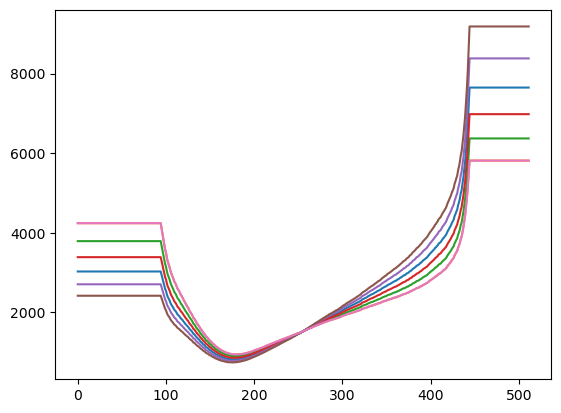

In [55]:
for ind in range(7):
    plt.plot(eq_coeffs_2[ind,:])

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


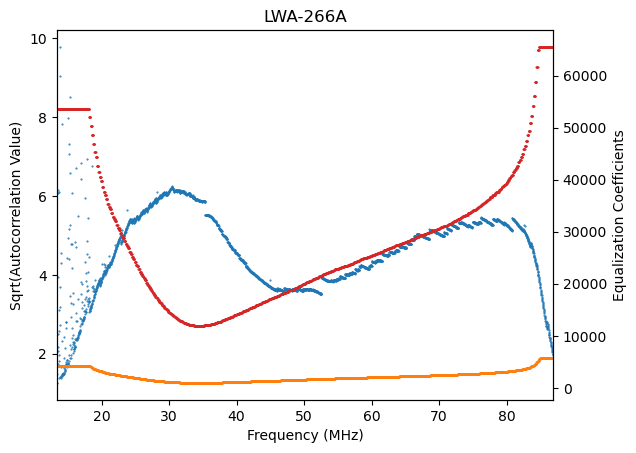

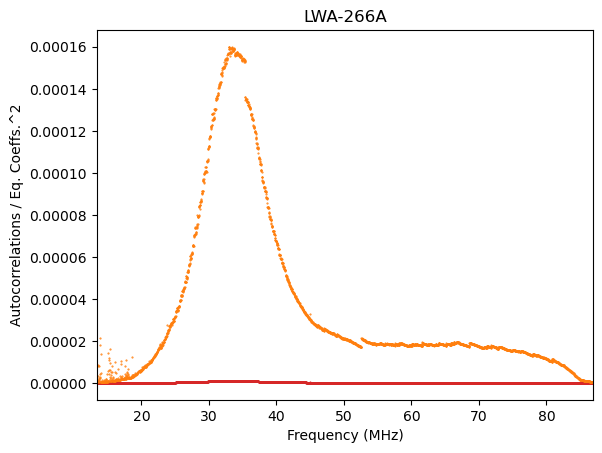

(0.006251619473803124+0j)


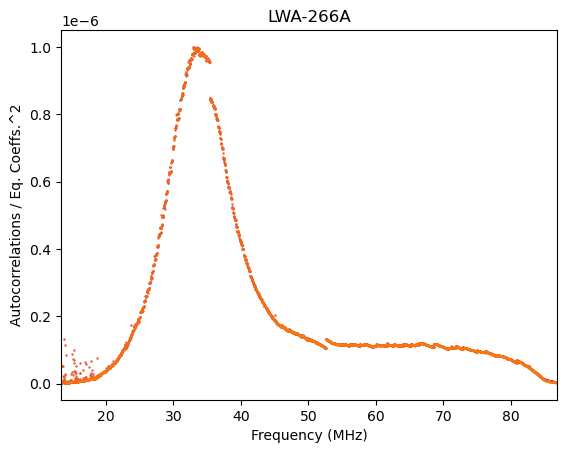

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


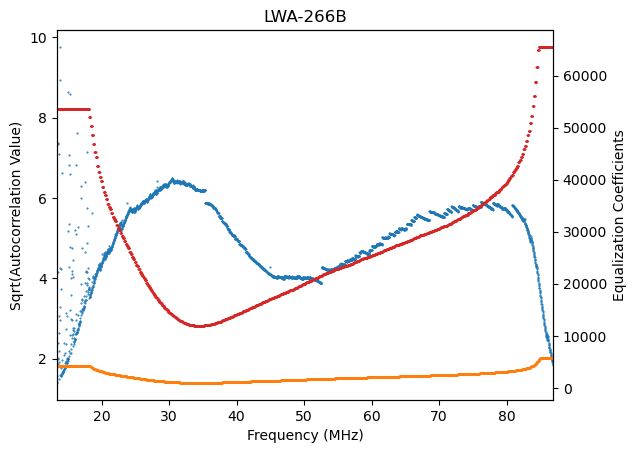

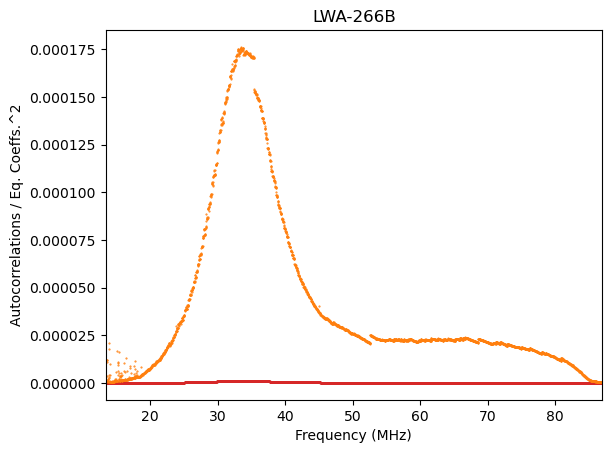

(0.00625135317749644+0j)


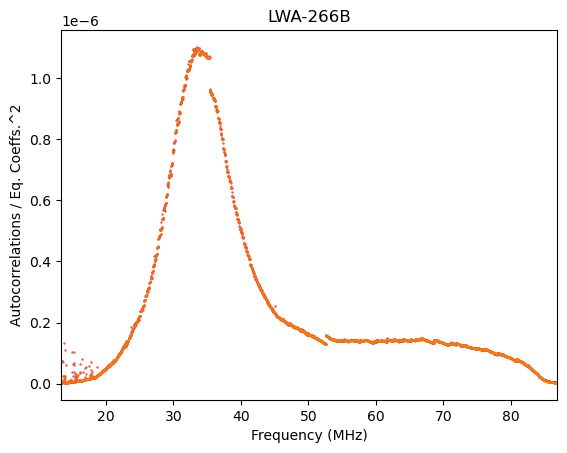

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


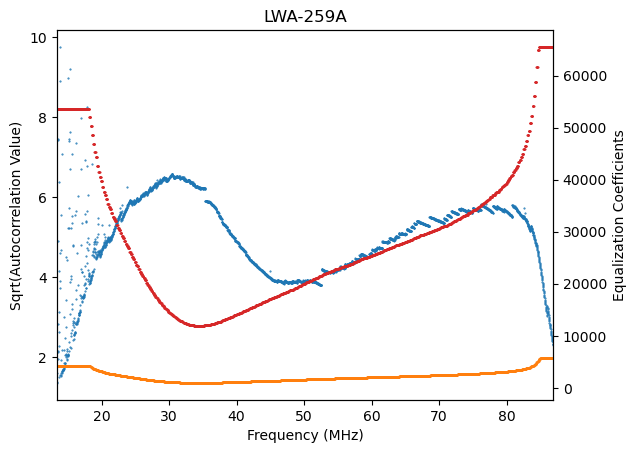

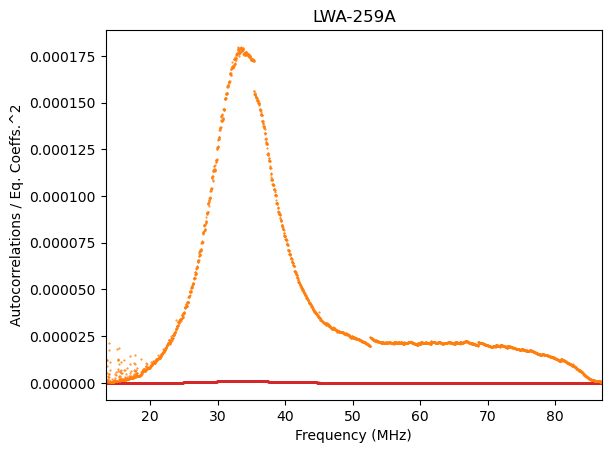

(0.006251838743960109+0j)


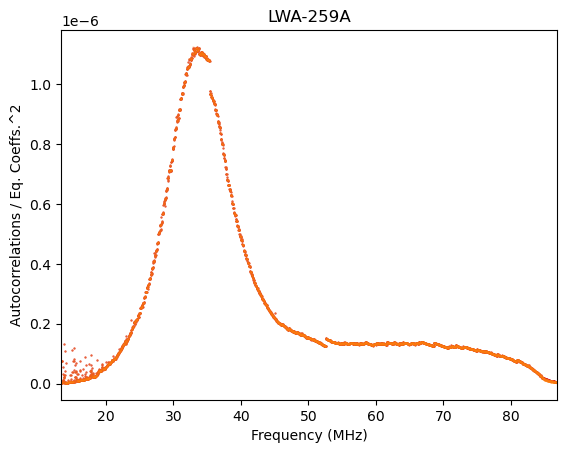

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


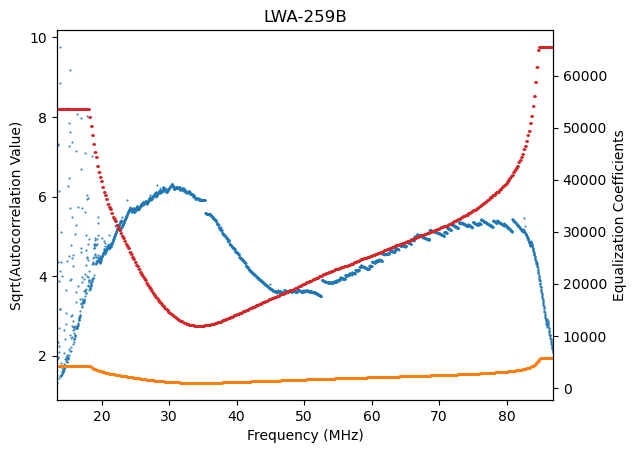

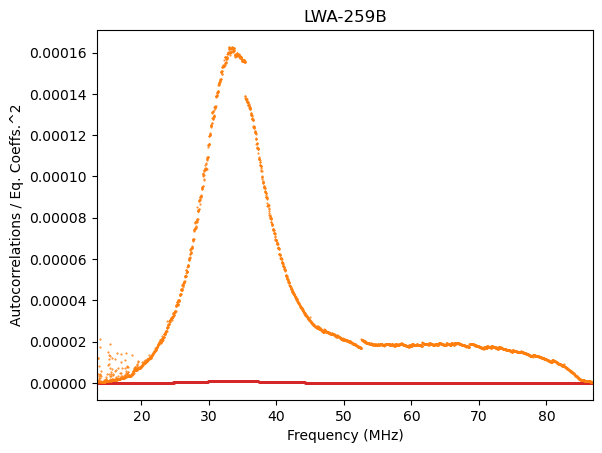

(0.006251678914768932+0j)


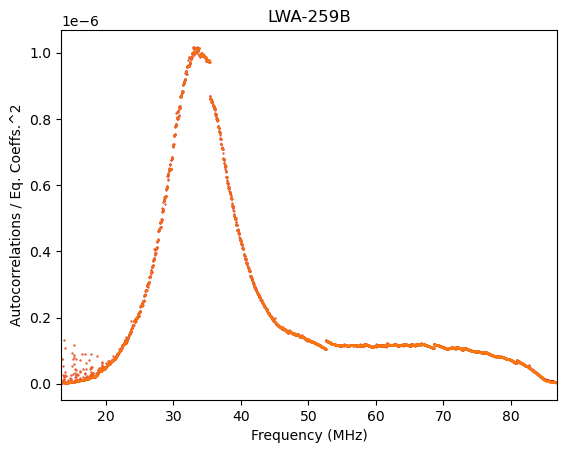

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


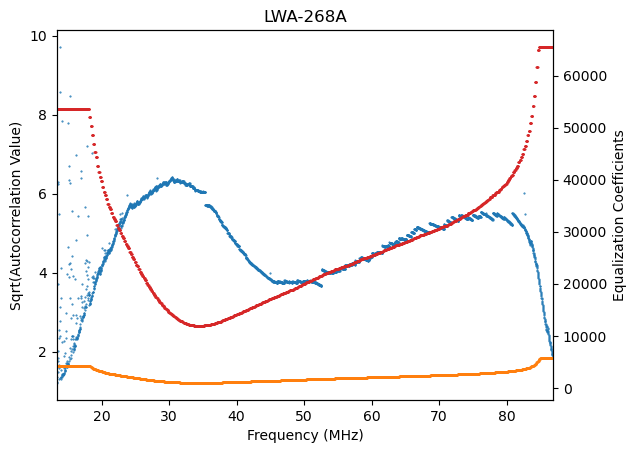

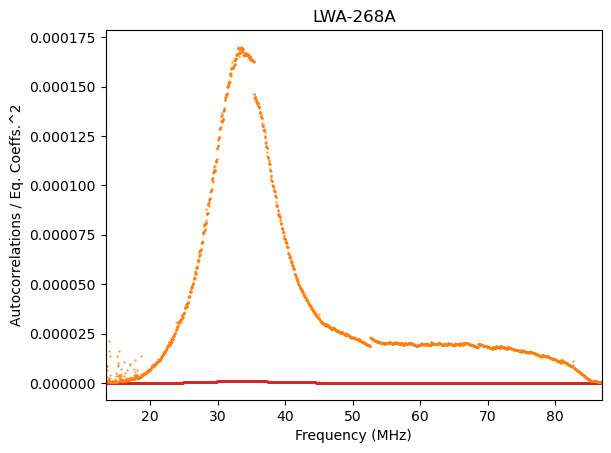

(0.006251435041909246+0j)


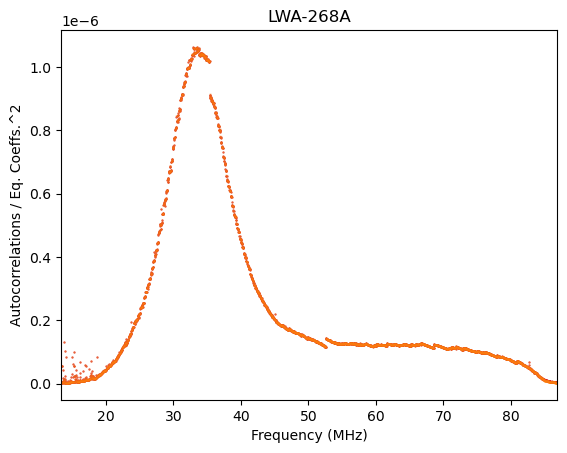

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


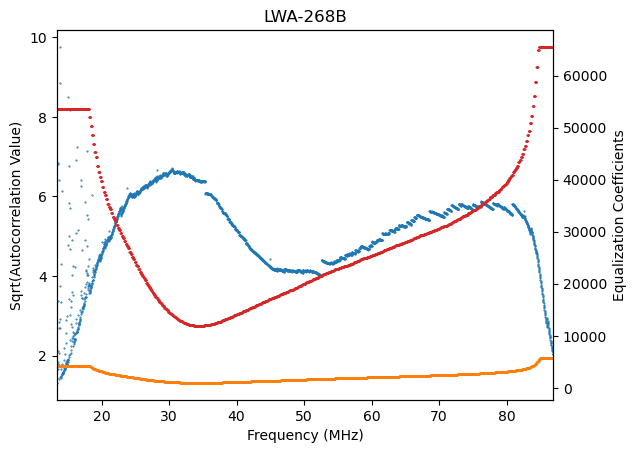

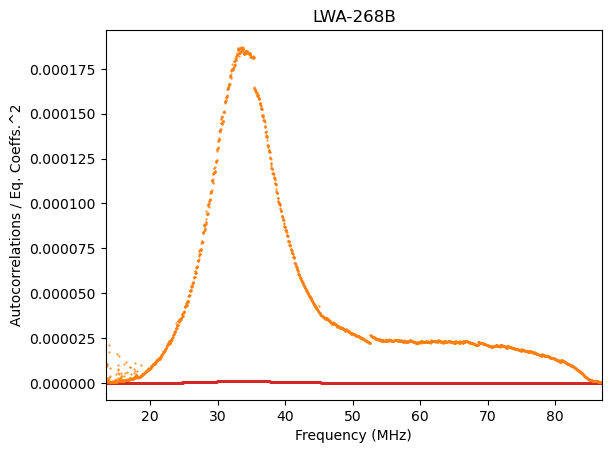

(0.006251509479699596+0j)


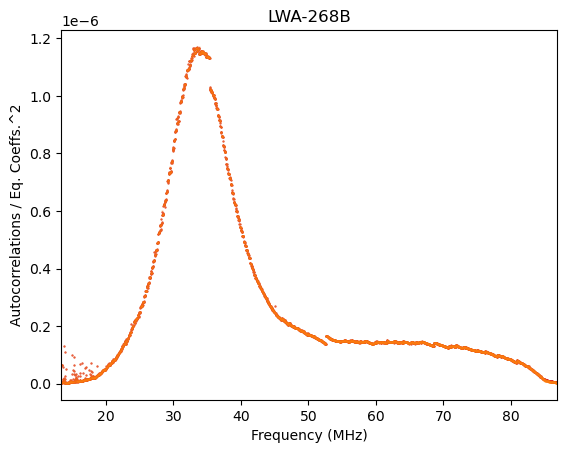

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


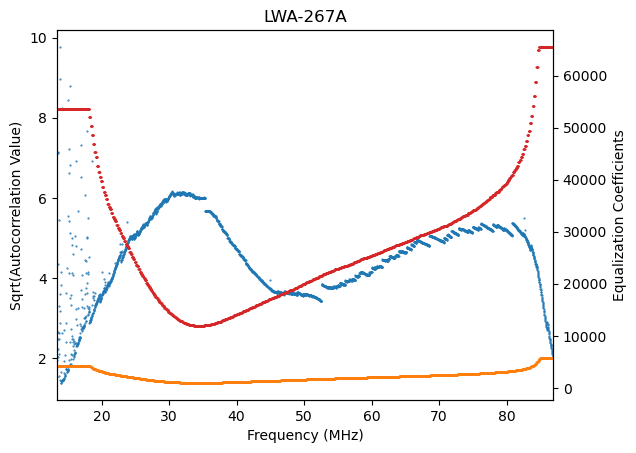

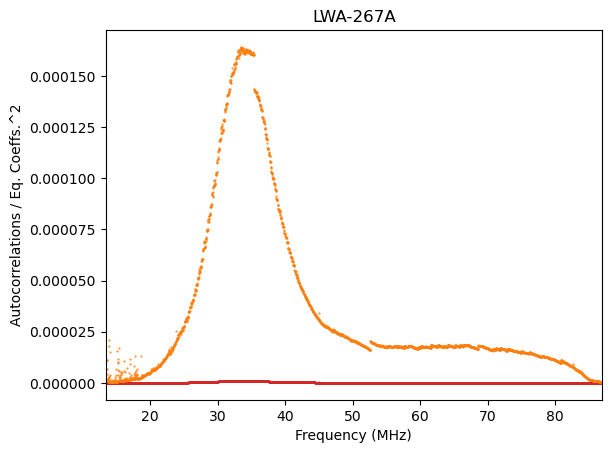

(0.006251693806315318+0j)


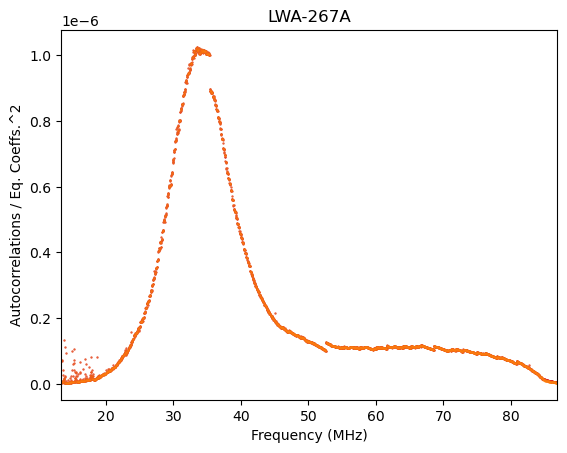

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


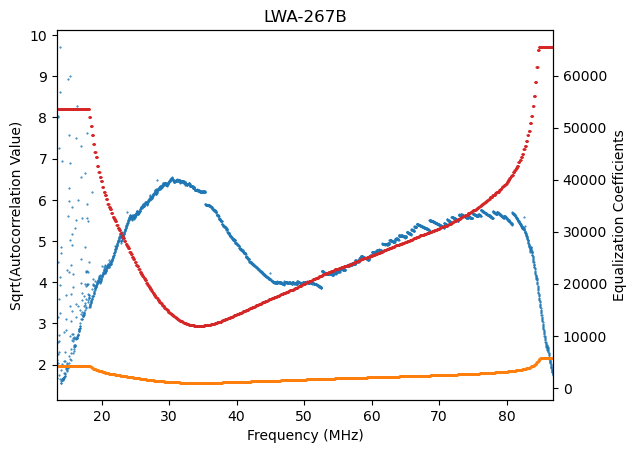

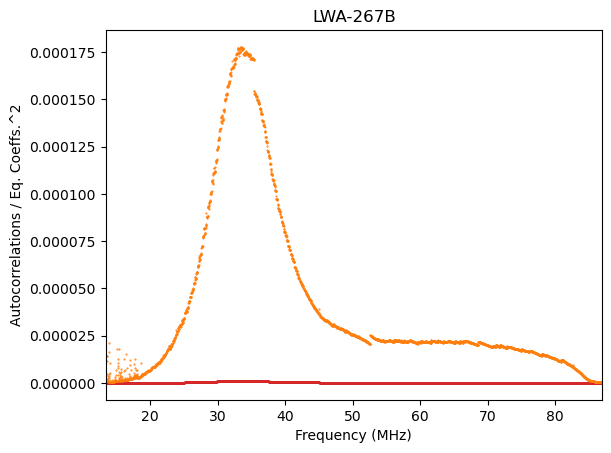

(0.006251272780452051+0j)


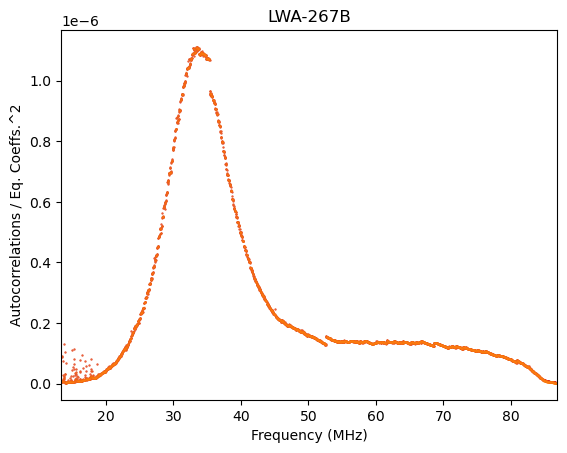

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


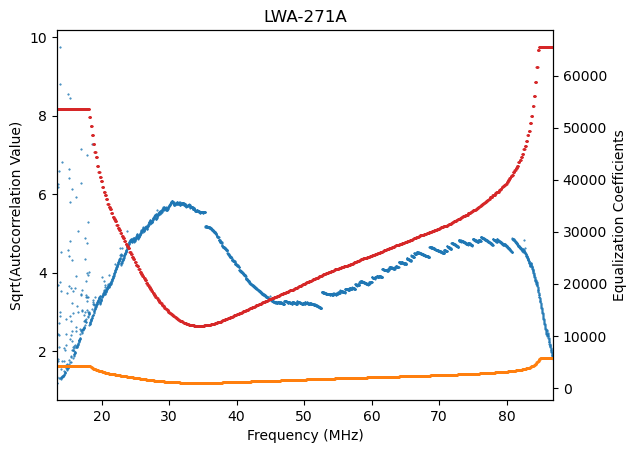

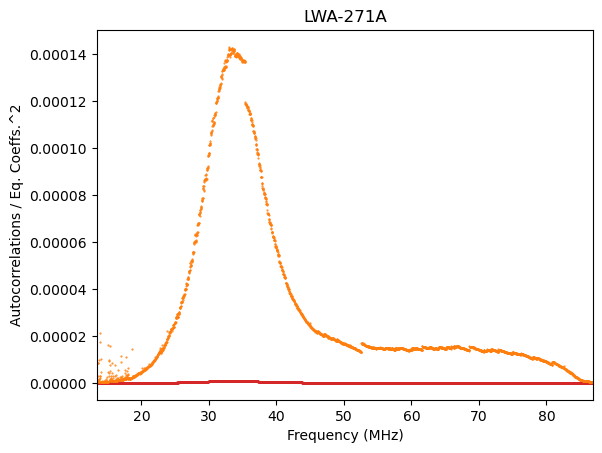

(0.006251561032295993+0j)


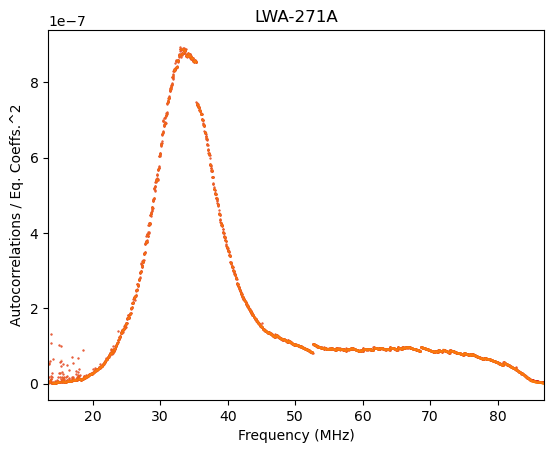

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


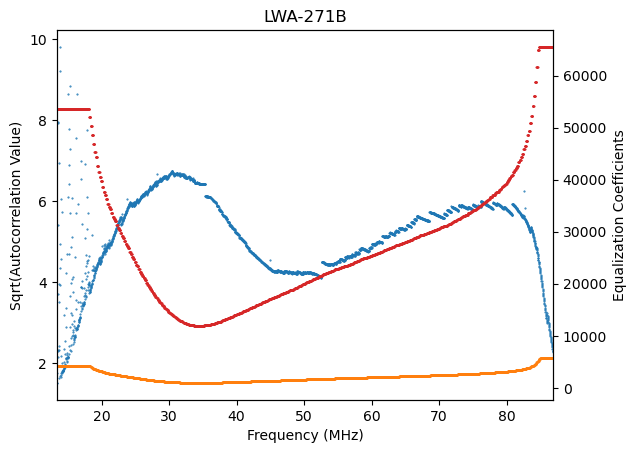

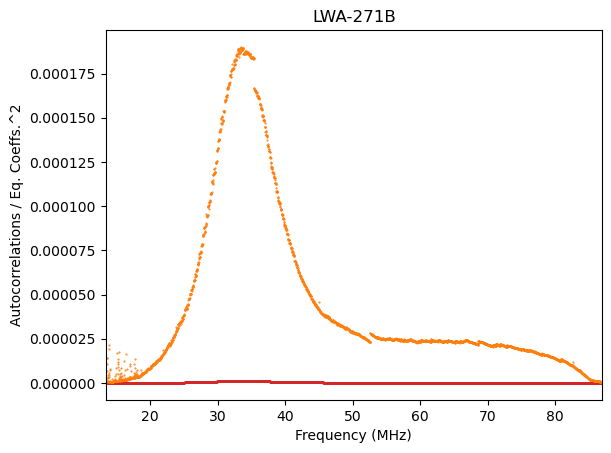

(0.006251700698947682+0j)


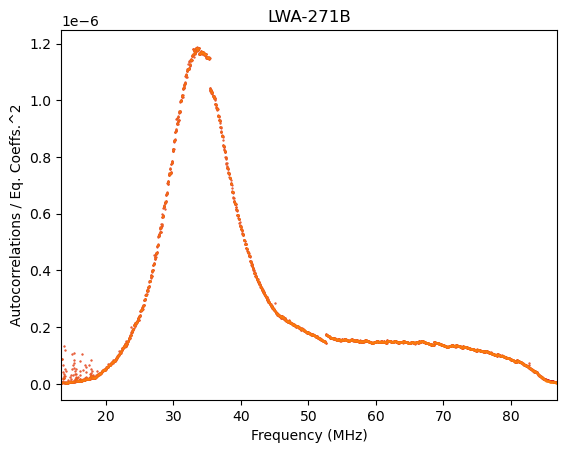

In [56]:
for ant_ind, ant in enumerate(dictionary["antnames"][0:10]):
    eq_coeffs = dictionary["coeffs_set"][dictionary["coeffs_set_inds"][ant_ind]]
    eq_coeffs = np.repeat(eq_coeffs, 8)  # One coefficient per 8 channels
    
    # Get equalization coefficients from original file
    ant_ind_2 = np.where(eq_coeffs_mat["antNames"] == ant)[0][0]
    for coeff_ind in range(7):
        if ant_ind_2 in eq_coeffs_mat[f"eq{coeff_ind}"]:
            break
    eq_coeffs_2 = eq_coeffs_mat["coef"][coeff_ind, :]
    eq_coeffs_2 = np.repeat(eq_coeffs_2, 8)  # One coefficient per 8 channels
    eq_freqs = np.arange(len(eq_coeffs)) * np.mean(uv.channel_width)

    # Truncate equalization coefficents to include only those saved in the data
    eq_coeffs = eq_coeffs[560:-464]
    eq_coeffs_2 = eq_coeffs_2[560:-464]
    eq_freqs = eq_freqs[560:-464]

    use_antname = f"{ant[0:3]}{ant[4:7]}"
    if ant[-1] == "A":
        use_pol = -5
    elif ant[-1] == "B":
        use_pol = -6
    autocorrs_single_ant = uv.select(antenna_names=use_antname, polarizations=use_pol, inplace=False)

    fig, ax1 = plt.subplots()
    ax1.set_title(ant)
    ax1.set_xlabel("Frequency (MHz)")
    ax1.plot(autocorrs_single_ant.freq_array/1e6, np.sqrt(autocorrs_single_ant.data_array[0, :, 0]), ".", markersize=1)
    ax1.set_ylabel("Sqrt(Autocorrelation Value)")
    #ax1.set_ylim([3.5,4.5])
    ax1.set_xlim([np.min(autocorrs_single_ant.freq_array)/1e6, np.max(autocorrs_single_ant.freq_array)/1e6])
    #ax1.set_xlim([50, 51])

    ax2=ax1.twinx()
    ax2.plot(eq_freqs/1e6, eq_coeffs, ".", markersize=1, color="tab:red")
    ax2.plot(eq_freqs/1e6, eq_coeffs_2, ".", markersize=1, color="tab:orange")
    ax2.set_ylabel("Equalization Coefficients")
    #ax2.set_ylim([17500,22500])
    plt.show()
    plt.close()

    lowest_eq_ind = np.where(eq_freqs == np.min(autocorrs_single_ant.freq_array))[0][0]
    highest_eq_ind = np.where(eq_freqs == np.max(autocorrs_single_ant.freq_array))[0][0]
    eq_coeffs = eq_coeffs[lowest_eq_ind:highest_eq_ind+1]
    eq_coeffs_2 = eq_coeffs_2[lowest_eq_ind:highest_eq_ind+1]
    eq_freqs = eq_freqs[lowest_eq_ind:highest_eq_ind+1]

    autos_normalized = autocorrs_single_ant.data_array[0, :, 0] / (0.25 * (eq_coeffs)**2.0)
    autos_normalized_2 = autocorrs_single_ant.data_array[0, :, 0] / (0.25 * (eq_coeffs_2)**2.0)
    plt.plot(autocorrs_single_ant.freq_array/1e6, autos_normalized, ".", markersize=1, color="tab:red")
    plt.plot(autocorrs_single_ant.freq_array/1e6, autos_normalized_2, ".", markersize=1, color="tab:orange")
    plt.xlim([np.min(autocorrs_single_ant.freq_array)/1e6, np.max(autocorrs_single_ant.freq_array)/1e6])
    plt.ylabel("Autocorrelations / Eq. Coeffs.^2")
    plt.xlabel("Frequency (MHz)")
    plt.title(ant)
    plt.show()
    plt.close()

    multiplicative_factor = np.mean(autos_normalized)/np.mean(autos_normalized_2)
    print(multiplicative_factor)
    plt.plot(autocorrs_single_ant.freq_array/1e6, autos_normalized, ".", markersize=1, color="tab:red")
    plt.plot(autocorrs_single_ant.freq_array/1e6, autos_normalized_2*multiplicative_factor, ".", markersize=2, color="tab:orange", alpha=0.2)
    plt.xlim([np.min(autocorrs_single_ant.freq_array)/1e6, np.max(autocorrs_single_ant.freq_array)/1e6])
    plt.ylabel("Autocorrelations / Eq. Coeffs.^2")
    plt.xlabel("Frequency (MHz)")
    plt.title(ant)
    plt.show()
    plt.close()

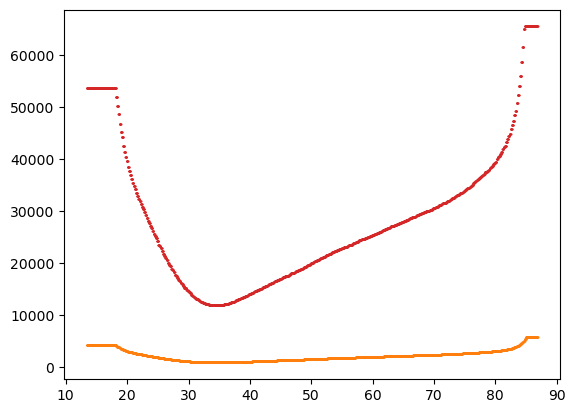

In [57]:
plt.plot(eq_freqs/1e6, eq_coeffs, ".", markersize=1, color="tab:red")
plt.plot(eq_freqs/1e6, eq_coeffs_2, ".", markersize=1, color="tab:orange")
plt.show()
plt.close()

[0.07905749 0.07905749 0.07905749 ... 0.08873487 0.08873487 0.08873487]


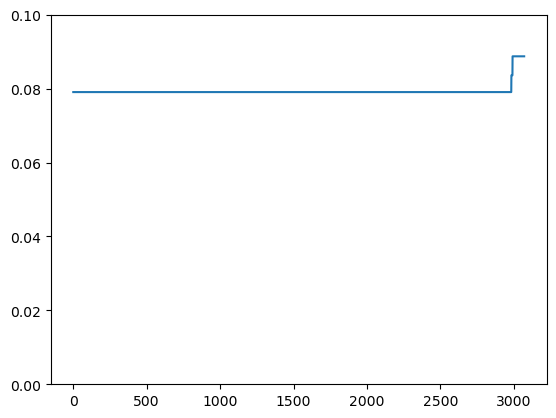

In [58]:
plt.plot(eq_coeffs_2/eq_coeffs)
plt.ylim(0,.1)
print(eq_coeffs_2/eq_coeffs)